In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


try:
    df = pd.read_csv('/content/drive/MyDrive/Admission.csv') # Corrected file path
    print("Dataset loaded successfully.")
    display(df.head())
except FileNotFoundError:


    data = {
        'GRE_Score': [300, 310, 320, 330, 340, 305, 315, 325, 335, 345],
        'TOEFL_Score': [100, 105, 110, 115, 120, 102, 107, 112, 117, 120],
        'University_Rating': [3, 4, 5, 4, 5, 3, 4, 5, 4, 5],
        'SOP': [3.0, 3.5, 4.0, 4.5, 5.0, 3.2, 3.8, 4.2, 4.8, 5.0],
        'LOR': [3.0, 3.5, 4.0, 4.5, 5.0, 3.2, 3.8, 4.2, 4.8, 5.0],
        'CGPA': [7.0, 7.5, 8.0, 8.5, 9.0, 7.2, 7.8, 8.2, 8.8, 9.2],
        'Research': [0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        'Admission': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1] # Target variable: 0 for no admission, 1 for admission
    }
    df = pd.DataFrame(data)

    display(df.head())

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/Admission.csv'


Distribution of 'Admission' column (Counts):
Admission
1    7
0    3
Name: count, dtype: int64

Distribution of 'Admission' column (Proportions %):
Admission
1    70.0
0    30.0
Name: proportion, dtype: float64


/tmp/ipython-input-2401199527.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Admission', data=df, palette='viridis')


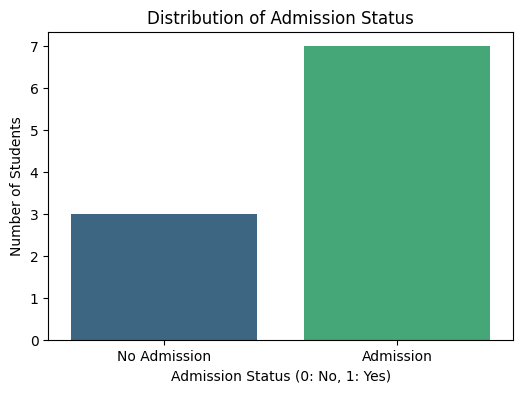

In [10]:
if df is not None and 'Admission' in df.columns:
    admission_distribution = df['Admission'].value_counts()
    admission_proportion = df['Admission'].value_counts(normalize=True) * 100

    print("\nDistribution of 'Admission' column (Counts):")
    print(admission_distribution)

    print("\nDistribution of 'Admission' column (Proportions %):")
    print(admission_proportion)

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(6, 4))
    sns.countplot(x='Admission', data=df, palette='viridis')
    plt.title('Distribution of Admission Status')
    plt.xlabel('Admission Status (0: No, 1: Yes)')
    plt.ylabel('Number of Students')
    plt.xticks(ticks=[0, 1], labels=['No Admission', 'Admission'])
    plt.show()
else:
    print("DataFrame is not available or 'Admission' column not found.")

In [15]:
if df is not None:

    if 'Admission' in df.columns:
        X = df.drop('Admission', axis=1)
        y = df['Admission']


        numeric_cols = X.select_dtypes(include=['number']).columns
        X = X[numeric_cols]


        X = X.fillna(X.mean())


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        print("Data prepared and split successfully.")
        print(f"X_train shape: {X_train.shape}")
        print(f"X_test shape: {X_test.shape}")
        print(f"y_train shape: {y_train.shape}")
        print(f"y_test shape: {y_test.shape}")

    else:
        print("Error: 'Admission' column not found in the dataset. Please check the column name.")
        X_train, X_test, y_train, y_test = None, None, None, None

Data prepared and split successfully.
X_train shape: (8, 7)
X_test shape: (2, 7)
y_train shape: (8,)
y_test shape: (2,)


In [17]:
if X_train is not None and y_train is not None:

    model = LogisticRegression(random_state=42, solver='liblinear')
    model.fit(X_train, y_train)

    print("Logistic Regression model trained successfully.")


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"\nModel Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    display(pd.DataFrame(conf_matrix, index=['Actual No Admission', 'Actual Admission'], columns=['Predicted No Admission', 'Predicted Admission']))
    print("\nClassification Report:")
    print(class_report)
else:
    print("Model training skipped due to previous data preparation errors.")

Logistic Regression model trained successfully.

Model Accuracy: 0.5000

Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Predicted No Admission,Predicted Admission
Actual No Admission,0,1
Actual Admission,0,1



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

